In [1]:
#Installing the necessary libraries
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!pip install pyspark==3.4.1
!pip install graphframes

In [2]:
import os
os.environ["PYSPARK_DRIVER_PYTHON"] = "jupyter"
os.environ["PYSPARK_DRIVER_PYTHON_OPTS"] = "notebook"

In [3]:
from graphframes import *
from pyspark import *
from pyspark.sql import *
spark = SparkSession.builder.appName('GraphFrames').config("spark.jars.packages", "graphframes:graphframes:0.8.3-spark3.4-s_2.12").getOrCreate()

In [4]:
vertices = spark.read.option('header', 'true').csv('vertices.csv')
edges = spark.read.option('header', 'true').csv('edges.csv')

graph = GraphFrame(vertices, edges)

/usr/local/lib/python3.12/dist-packages/pyspark/sql/dataframe.py:169: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


In [5]:
import os
os.environ["PYSPARK_DRIVER_PYTHON"] = "jupyter"
os.environ["PYSPARK_DRIVER_PYTHON_OPTS"] = "notebook"
# Removed os.environ["PYSPARK_SUBMIT_ARGS"] to avoid potential conflicts with spark.jars.packages

In [6]:
from graphframes import *
from pyspark import *
from pyspark.sql import *
spark = SparkSession.builder.appName('GraphFrames').config("spark.jars.packages", "graphframes:graphframes:0.8.3-spark3.4-s_2.12").getOrCreate()

In [7]:
vertices = spark.read.option('header', 'true').csv('vertices.csv')
edges = spark.read.option('header', 'true').csv('edges.csv')

graph = GraphFrame(vertices, edges)

In [8]:
#Displaying the vertices and edges
vertices.show(5)
edges.show(5)

+---+-------+--------+
| id|   name|    type|
+---+-------+--------+
| c1|  Alice|Customer|
| c2|    Bob|Customer|
| c3|Charles|Customer|
| c4|  David|Customer|
| c5| Evelyn|Customer|
+---+-------+--------+
only showing top 5 rows

+---+---+--------------+
|src|dst|      relation|
+---+---+--------------+
| b1| c1|manage_account|
| b1| c2|manage_account|
| b2| c3|manage_account|
| b2| c4|manage_account|
| b2| c5|manage_account|
+---+---+--------------+
only showing top 5 rows



### Query A
Apply filters for any one relationship and display the degrees, out degress and in degrees of result from the filtered data

In [9]:
# Filter out "friend" relationship
filtered_edges = edges.filter("relation = 'friend'")

# Create a graph of vertices and edges
graph_friend = GraphFrame(vertices, filtered_edges)

# Display degrees, out degrees, in degrees
print("Degrees:")
graph_friend.degrees.show(truncate=False)

print("OutDegrees:")
graph_friend.outDegrees.show(truncate=False)

print("InDegrees:")
graph_friend.inDegrees.show(truncate=False)

Degrees:


/usr/local/lib/python3.12/dist-packages/pyspark/sql/dataframe.py:148: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+------+
|id |degree|
+---+------+
|c20|1     |
|c1 |1     |
|c18|1     |
|c19|1     |
|c16|1     |
|c15|1     |
|c3 |1     |
|c17|1     |
|c14|1     |
|c2 |1     |
+---+------+

OutDegrees:
+---+---------+
|id |outDegree|
+---+---------+
|c1 |1        |
|c15|1        |
|c3 |1        |
|c17|1        |
|c2 |1        |
+---+---------+

InDegrees:
+---+--------+
|id |inDegree|
+---+--------+
|c20|1       |
|c18|1       |
|c19|1       |
|c16|1       |
|c14|1       |
+---+--------+



###Query B
Display the number of customers managed by each branch head in descending order.

In [10]:
manage_edges = edges.filter("relation = 'manage_account'")
manage_edges.groupBy("src").count().orderBy("count", ascending=False).show()

+---+-----+
|src|count|
+---+-----+
| b4|    8|
| b2|    6|
| b5|    6|
| b3|    5|
| b1|    5|
+---+-----+



###Query C
Create the network diagram to display the edges and vertices and discuss the results of triangle count from the network diagram

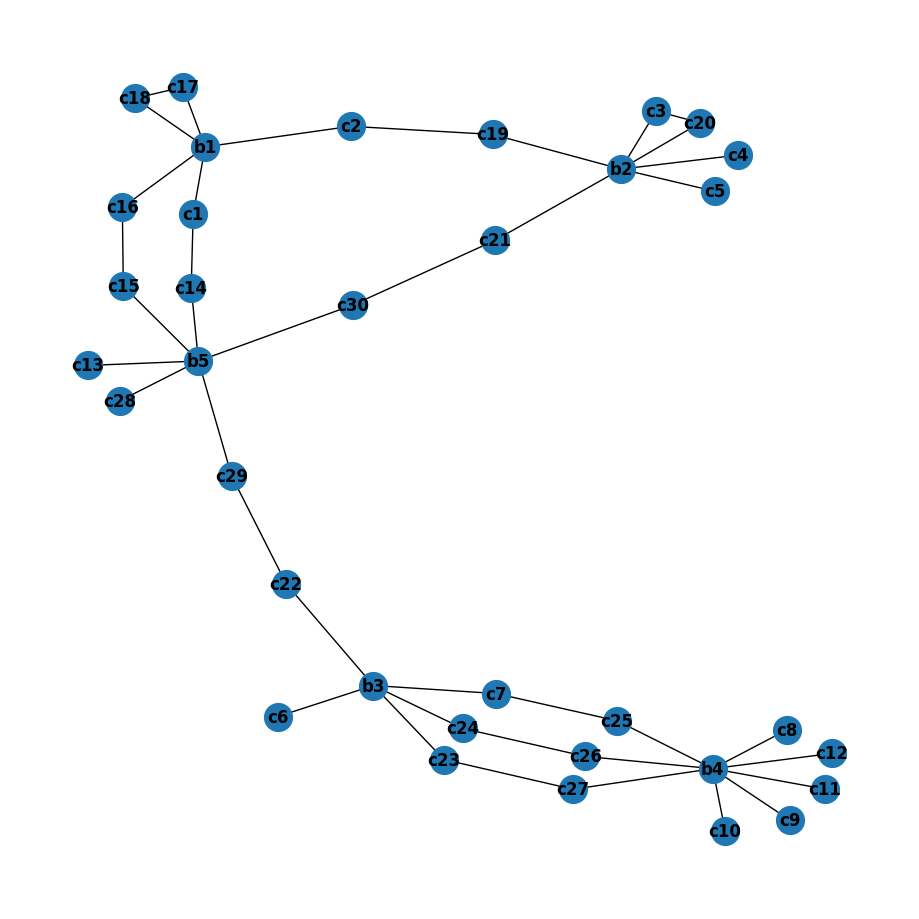

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a function to plot the source and destination nodes and connect them by meand of undirected line
def plot_undirected_graph(edge_list):
    plt.figure(figsize=(9,9))
    gplot=nx.Graph()
    for row in edge_list.select("src", "dst").take(1000):
        gplot.add_edge(row["src"], row["dst"])
    nx.draw(gplot, with_labels=True, font_weight="bold", node_size=400)
    plt.show()

# Plot the undirected graph
plot_undirected_graph(graph.edges)

In [12]:
triangles = graph.triangleCount()
row_count = triangles.count()
triangles.show(row_count, truncate=False)

+-----+---+-------+----------+
|count|id |name   |type      |
+-----+---+-------+----------+
|0    |c24|Sharon |Customer  |
|1    |c20|Brian  |Customer  |
|0    |c13|Naomi  |Customer  |
|0    |c27|Smith  |Customer  |
|0    |c28|Johnson|Customer  |
|0    |c26|Julia  |Customer  |
|0    |c7 |Gina   |Customer  |
|1    |b2 |Linda  |BranchHead|
|0    |c9 |Ivy    |Customer  |
|0    |c5 |Evelyn |Customer  |
|0    |c1 |Alice  |Customer  |
|1    |c18|Vivian |Customer  |
|0    |c19|Alex   |Customer  |
|0    |c6 |Fiona  |Customer  |
|0    |c25|Jill   |Customer  |
|0    |c12|Mandy  |Customer  |
|0    |c22|Ethan  |Customer  |
|0    |c29|Xavier |Customer  |
|0    |c16|Sam    |Customer  |
|0    |b3 |Oscar  |BranchHead|
|1    |b1 |John   |BranchHead|
|0    |c8 |Henry  |Customer  |
|0    |c15|Richard|Customer  |
|0    |c4 |David  |Customer  |
|1    |c3 |Charles|Customer  |
|0    |c21|Jessie |Customer  |
|1    |c17|Tiffany|Customer  |
|0    |c14|Peter  |Customer  |
|0    |b4 |Chris  |BranchHead|
|0    |c